---
**PROCESO**	
- [x] Cargar archivo, ver el contenido, preprocesarlo
- [ ] Procesar y manipular los datos
- [ ] Aplicar algoritmos para estudiar los datos
---

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns # Importamos librerias de graficos
%matplotlib inline 
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('argentina_cars.csv')
df.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [36]:
headers = ["Precio", "Marca", "Modelo", "Año", "Color", "Combustible", "Puertas", "Transmision", "Motor", "Carroceria", "Km", "Moneda"]
df.columns = headers

In [37]:
df.head()

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Precio       510 non-null    int64  
 1   Marca        510 non-null    object 
 2   Modelo       510 non-null    object 
 3   Año          510 non-null    int64  
 4   Color        499 non-null    object 
 5   Combustible  510 non-null    object 
 6   Puertas      510 non-null    float64
 7   Transmision  509 non-null    object 
 8   Motor        499 non-null    object 
 9   Carroceria   509 non-null    object 
 10  Km           510 non-null    int64  
 11  Moneda       510 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 47.9+ KB


---
**PROCESO**	
- [x] Cargar archivo, ver el contenido
- [x] Procesar y manipular los datos
- [ ] Aplicar algoritmos para estudiar los datos
---

In [39]:
df.isnull().sum() # Para corroborar si faltan datos, determinar en que columna estan.

Precio          0
Marca           0
Modelo          0
Año             0
Color          11
Combustible     0
Puertas         0
Transmision     1
Motor          11
Carroceria      1
Km              0
Moneda          0
dtype: int64

In [40]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns].head(24))
# Con esta sentencia veo que datos son los que estan nulos (NAN), como son pocos en realidad le pido que me muestre
# los 24 valores asi analizo y veo que hacer si rellenar o borrar los datos faltantes.

           Color Transmision         Motor   Carroceria
0       Plateado  Automática           NaN          SUV
3    Gris oscuro  Automática           NaN          SUV
12      Plateado      Manual           NaN        Sedán
14         Negro  Automática           NaN    Hatchback
16          Gris  Automática           NaN          SUV
24         Negro      Manual           NaN    Hatchback
31         Negro      Manual           NaN      Pick-Up
34          Rojo      Manual           NaN    Hatchback
55          Gris      Manual           NaN        Coupé
56        Blanco  Automática           NaN        Sedán
208          NaN      Manual           4.4          SUV
211        Negro         NaN  2.8tdi 223cv      Pick-Up
231          NaN  Automática           1.8        Sedán
256          NaN      Manual           2.0        Sedán
278         Rojo      Manual           NaN          NaN
290          NaN      Manual           1.6        Sedán
295          NaN      Manual           1.4    Ha

In [41]:
df['Color'] = df['Color'].fillna("Gris") # En este caso lleno con el color mas comun.
df['Transmision'] = df['Transmision'].fillna("Manual") # En este caso lleno con el tipo de transmision mas comun.
df['Motor'] = df['Motor'].fillna(1.6) # Aqui relleno con el tipo de motor mas vendido o usado
df['Carroceria'] = df['Carroceria'].fillna("Sedan")

In [42]:
df.isnull().sum()
# Vuelvo a pasar esta sentencia para verificar que ya no hay valores NAN (Not A Number)

Precio         0
Marca          0
Modelo         0
Año            0
Color          0
Combustible    0
Puertas        0
Transmision    0
Motor          0
Carroceria     0
Km             0
Moneda         0
dtype: int64

In [43]:
df.head(3)

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares


Explorando un poco los datos para ver como estan compuestos y si necesitan alguna revision

In [44]:
df.Marca.value_counts()

Volkswagen       88
Ford             57
Chevrolet        51
Peugeot          49
Toyota           47
Renault          45
Citroën          32
Fiat             25
Jeep             20
Honda            18
Mercedes-Benz    14
BMW              13
Hyundai           9
Audi              8
Nissan            8
RAM               6
Dodge             4
Kia               3
DS                2
Mitsubishi        2
Mini              2
Volvo             2
Baic              1
Porsche           1
Suzuki            1
Subaru            1
Chery             1
Name: Marca, dtype: int64

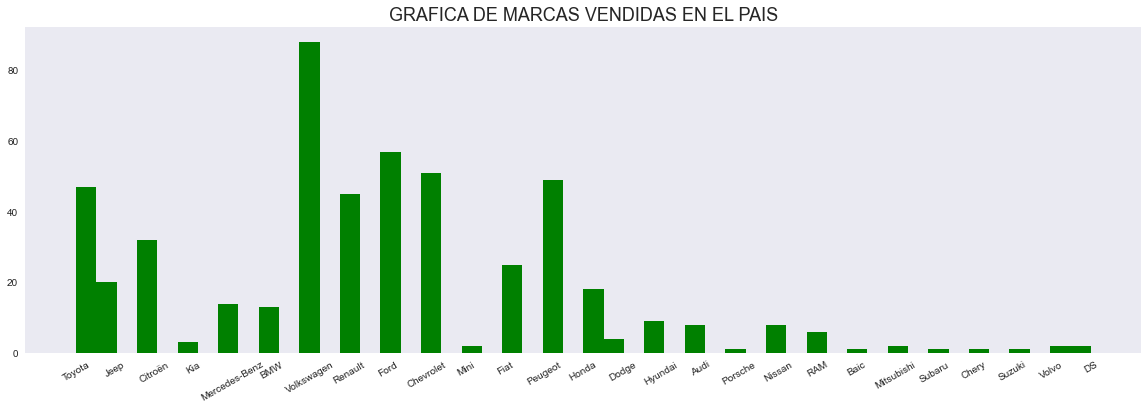

<Figure size 576x396 with 0 Axes>

In [106]:
df['Marca'].hist(bins=50, color='green') # Vemos graficamente su distribución
plt.title('GRAFICA DE MARCAS VENDIDAS EN EL PAIS', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(20, 6)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()




In [12]:
df.Combustible.value_counts()

Nafta            416
Diésel            72
Nafta/GNC         19
Híbrido/Nafta      3
Name: Combustible, dtype: int64

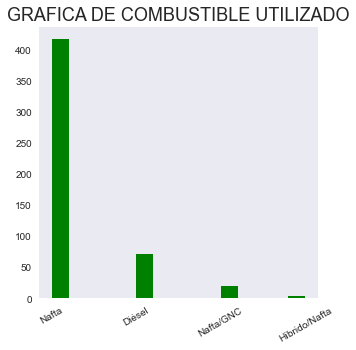

<Figure size 576x396 with 0 Axes>

In [100]:
df['Combustible'].hist(bins=15, color='green') # Vemos graficamente su distribución
plt.title('GRAFICA DE COMBUSTIBLE UTILIZADO', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(5, 5)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

In [107]:
df.Carroceria.value_counts()

Hatchback      184
SUV            130
Sedán           98
Pick-Up         55
Monovolumen     18
Coupé           11
Furgón           8
Rural            3
Sedan            1
Minivan          1
Crossover        1
Name: Carroceria, dtype: int64

In [108]:
# En este caso hay 3 tipos de carroceria que voy a eliminar y agregar en otras mas representativas.
df.Carroceria = df.Carroceria.replace(["Sedan"], "Sedán")
df.Carroceria = df.Carroceria.replace(["Minivan", "Crossover"], "SUV")

In [109]:
# Vuelvo para ver como quedan los valores de esa columna.
df.Carroceria.value_counts()

Hatchback      184
SUV            132
Sedán           99
Pick-Up         55
Monovolumen     18
Coupé           11
Furgón           8
Rural            3
Name: Carroceria, dtype: int64

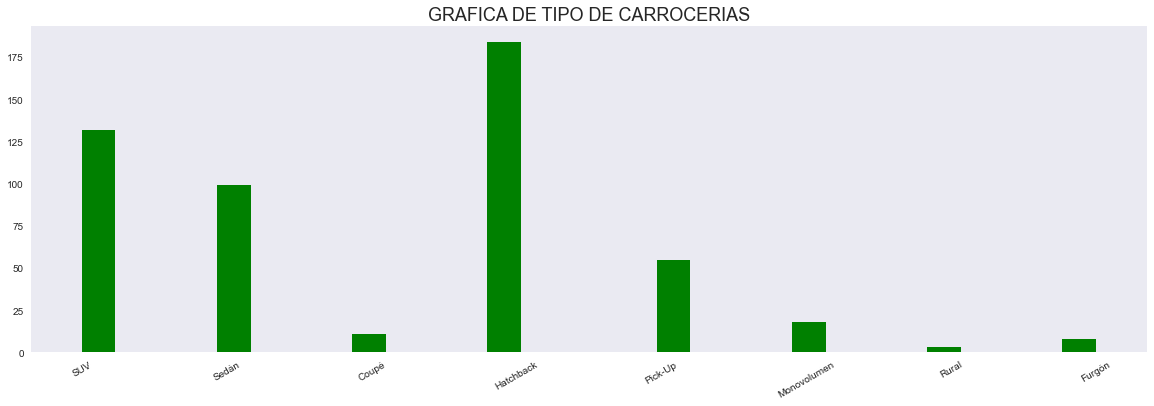

<Figure size 576x396 with 0 Axes>

In [110]:
df['Carroceria'].hist(bins=30, color='green') # Vemos graficamente su distribución
plt.title('GRAFICA DE TIPO DE CARROCERIAS', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(20, 6)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

In [31]:
df.Color.value_counts()

Gris           169
Blanco         150
Negro           60
Plateado        53
Azul            25
Rojo            24
Dorado           8
Marrón           4
Celeste          4
Violeta          4
Gris oscuro      3
Naranja          3
Verde            2
Beige            1
Name: Color, dtype: int64

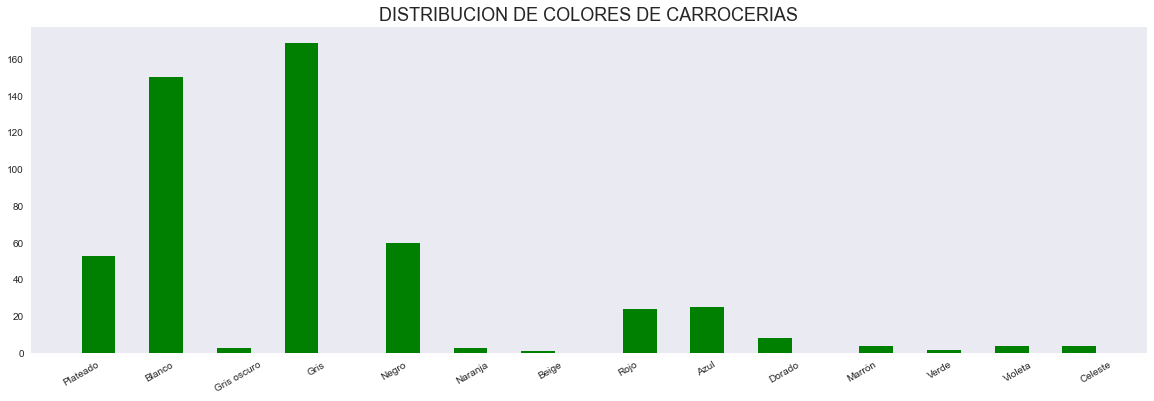

<Figure size 576x396 with 0 Axes>

In [111]:
df['Color'].hist(bins=30, color='green') # Vemos graficamente su distribución
plt.title('DISTRIBUCION DE COLORES DE CARROCERIAS', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(20, 6)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

---
**PROCESO**	
- [x] Cargar archivo, ver el contenido, preprocesarlo
- [x] Procesar y manipular los datos
- [x] Aplicar algoritmos para estudiar los datos
---

In [113]:
df.corr()

,Precio,Año,Puertas,Km
Precio,1.000000,0.428133,0.070264,-0.219567
Año,0.428133,1.000000,0.083977,-0.679453
Puertas,0.070264,0.083977,1.000000,-0.078398
Km,-0.219567,-0.679453,-0.078398,1.000000


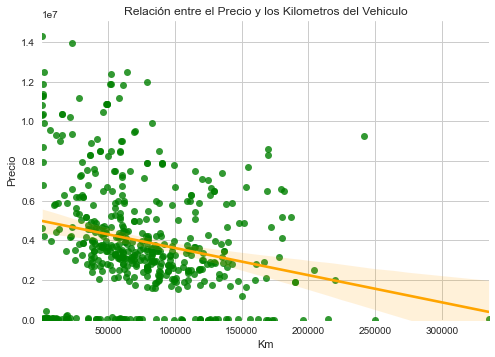

In [132]:
sns.regplot(x="Km", y="Precio", data=df, line_kws={"color": "orange"}, scatter_kws={"color": "green"})
plt.ylim(0,)
plt.title("Relación entre el Precio y los Kilometros del Vehiculo")
sns.set_style("whitegrid") # Fondo con cuadrícula

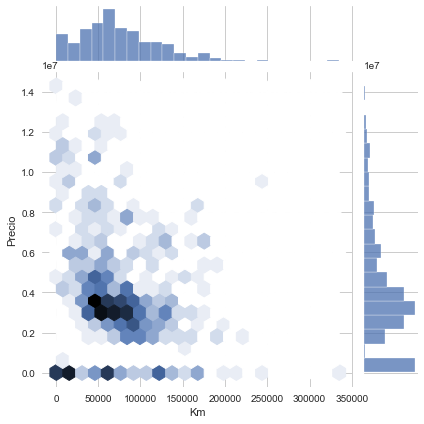

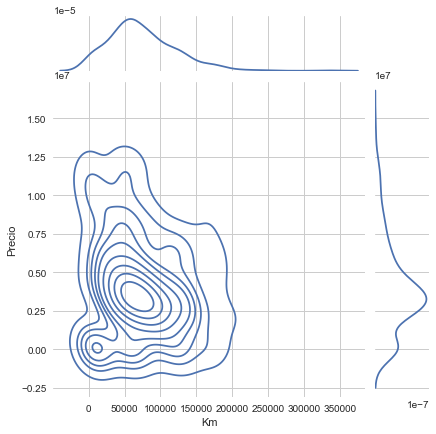

In [140]:
# Graficos para ver bien donde estan repetidos los valores, dos formas de verlos mejor
sns.jointplot(x="Km", y="Precio", data=df, kind="hex")
plt.show()

sns.jointplot(x="Km", y="Precio", data=df, kind="kde")
plt.show()


La relación entre Km y Precio es bastante obvia pero a titulo de demostración y practica, calculo una regresión lineal
teniendo en cuenta estos valores.

In [143]:
# Regresión lineal
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [145]:
X = df[['Km']]
Y = df['Precio']

In [146]:
lm.fit(X,Y) # Entrenamos el modelo

LinearRegression()

In [149]:
Yhat=lm.predict(X)
Yhat[0:5] # Selecciona las primeras 5 predicciones de la matriz

array([4983153.12497787, 4983153.12497787, 4983153.12497787,
       4982468.10030982, 4866698.93140833])

In [161]:
print ('Intercepcion: ',lm.intercept_, 'o lo que es lo mismo, cuando X=0, Y tendra ese valor')
print ('Coeficiente: ', lm.coef_)

Intercepcion:  4990003.371658436 o lo que es lo mismo, cuando X=0, Y tendra ese valor
Coeficiente:  [-13.70049336]


In [153]:
# Sera una regresión lineal con la formula Y=a+bX, donde a=intercept y donde b=coef
# Que seria como decir
# Y = 4990003.37 - 13.9663xBeneficio/Acciones
# Con esta formula podremos predecir el precio.

In [162]:
# Pido predecir el modelo de regresión lineal (lm) previamente entrenado
Yhat=lm.predict(X)
lm.predict(X)


array([4983153.12497787, 4983153.12497787, 4983153.12497787,
       4982468.10030982, 4866698.93140833, 4846148.19136665,
       2852726.40732326, 2606117.52682305, 4085770.80982432,
       4510486.10401913, 4231078.24241239, 2769427.40768764,
       3467727.85381071, 3467727.85381071, 4513226.20269136,
       3606253.54218502, 3989867.35629646, 3852862.42268524,
       3633654.52890727, 2523914.56665631, 3893963.9027686 ,
       3551451.56874053, 3921364.88949085, 2660919.50026754,
       3291142.1948792 , 4154273.27662994, 4469384.62393577,
       2523914.56665631, 4236476.23679668, 3688456.50235176,
       2432121.26113679, 4702293.01107485, 3482949.10193492,
       4140572.78326882, 4058369.82310208, 3277441.70151807,
       4455684.13057464, 2976030.84757337, 4113171.79654657,
       3756958.96915738, 4674892.02435261, 3852862.42268524,
       3633654.52890727, 3962466.36957422, 4209075.25007443,
       3647355.02226839, 3825461.43596299, 4983016.12004426,
       4387181.66376903,

(0.0, 15070023.987733003)

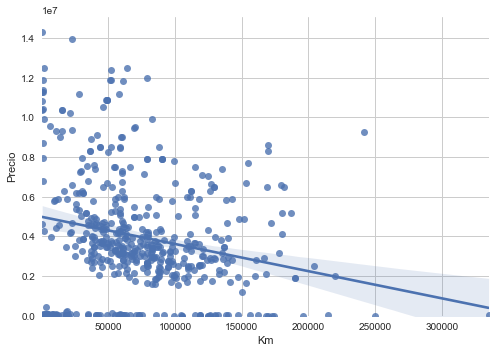

In [156]:
sns.regplot (x="Km", y="Precio", data=df)
plt.ylim (0, )

Procedo a evaluar la precisión del modelo comparando Yhat con los valores reales

## Mean Squared Error (MSE).

Busca la diferencia entre
el valor actual y la prediccion. Vamos a suponer a modo de ejemplo un caso donde el valor actual es 150 y el de la predicción es un valor de 50. Entonces tenemos la diferencia que es 150-50=100, a esa diferencia la elevamos al cuadrado (100)². Ahora de todos los errores asi calculados sacar la media o promedio dividiendo por la cantidad de muestra. El modelo con el mennor MSE es el que mejor se ajusta a los datos.

In [168]:
from sklearn.metrics import mean_squared_error

In [169]:
mse = mean_squared_error(df['Precio'], Yhat)
print('El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es: ', mse)

El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es:  8090860395338.652


---
El valor obtenido, 8090860395338.652, es extremadamente alto. Indica que hay una gran discrepancia entre los valores reales dentro de (df['Precio']) y los valores predichos con el modelo ya entrenado (Yhat) 

---
**Interpretación del MSE:**

MSE alto

Indica que el modelo tiene un mal desempeño.

Los errores entre los valores reales y los predichos son muy grandes.

Esto puede deberse a:

- Un modelo que no se ajusta bien a los datos.

- Datos con mucha variabilidad o ruido.

- Variables independientes que no tienen una relación lineal con la variable dependiente.

MSE bajo

- Indica que el modelo tiene un buen desempeño.

- Los errores entre los valores reales y los predichos son pequeños.